# EDA
### 1. Load the Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import joblib
import streamlit as st

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = 'marketing_campaign.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Display summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [4]:
# Display summary statistics for numerical columns
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


### 2. Understanding the Data
Inspect the dataset to understand its structure and content.

In [5]:
# Check for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# Check data types of each column
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [7]:
# Display unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [8]:
df.Z_CostContact.value_counts()

Z_CostContact
3    2240
Name: count, dtype: int64

In [9]:
df.Z_Revenue.value_counts()

Z_Revenue
11    2240
Name: count, dtype: int64

In [10]:
df.Marital_Status.value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

### 7. Feature Engineering
Create new features from existing ones.

In [11]:
# Create a new feature: total amount spent
df['TotalSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Create a new feature: age of the customer
df['Age'] = 2024 - df['Year_Birth']

# Create a new feature: number of children and teenagers combined
df['TotalKids'] = df['Kidhome'] + df['Teenhome']

# Display the first few rows to check the new features
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,TotalKids
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,1617,67,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,27,70,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,776,59,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,53,40,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,422,43,1


### 3. Data Cleaning
Handle missing values, correct data types, removing useless columns and treating outliers

In [12]:
# Fill missing values with column mean
df.fillna(df.Income.mean(), inplace=True)

In [13]:
# Correct data types if necessary
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [14]:
# Check for duplicates
df.duplicated().sum()

0

In [15]:
df.drop(columns=["ID","Year_Birth","Dt_Customer","Z_CostContact","Z_Revenue"], axis = 1, inplace = True)
df.drop(df.loc[df['Marital_Status']== "Alone"].index, inplace=True)
df.drop(df.loc[df['Marital_Status']== "Absurd"].index, inplace=True)
df.drop(df.loc[df['Marital_Status']== "YOLO"].index, inplace=True)

In [16]:
# One-hot encoding
df = pd.get_dummies(df,dtype=int)

In [17]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'TotalSpent', 'Age',
       'TotalKids', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2233 non-null   float64
 1   Kidhome                  2233 non-null   int64  
 2   Teenhome                 2233 non-null   int64  
 3   Recency                  2233 non-null   int64  
 4   MntWines                 2233 non-null   int64  
 5   MntFruits                2233 non-null   int64  
 6   MntMeatProducts          2233 non-null   int64  
 7   MntFishProducts          2233 non-null   int64  
 8   MntSweetProducts         2233 non-null   int64  
 9   MntGoldProds             2233 non-null   int64  
 10  NumDealsPurchases        2233 non-null   int64  
 11  NumWebPurchases          2233 non-null   int64  
 12  NumCatalogPurchases      2233 non-null   int64  
 13  NumStorePurchases        2233 non-null   int64  
 14  NumWebVisitsMonth        2233

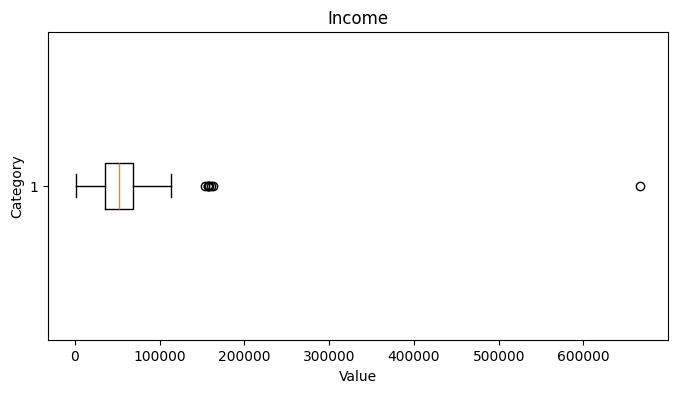

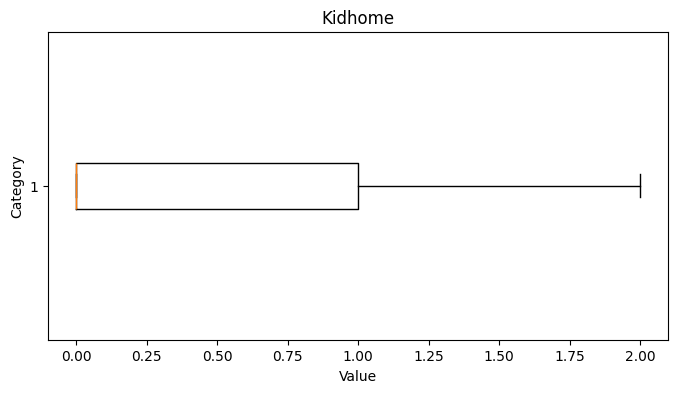

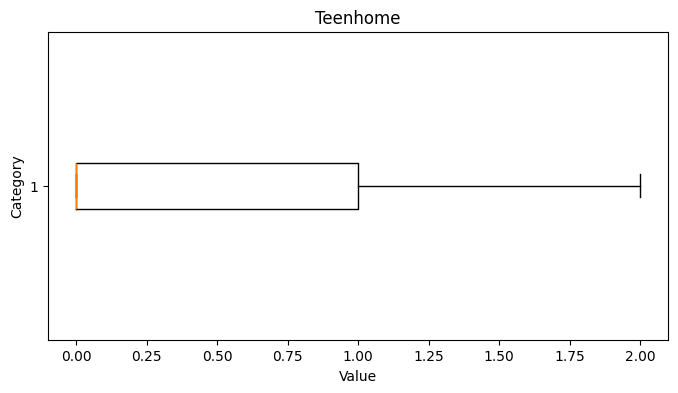

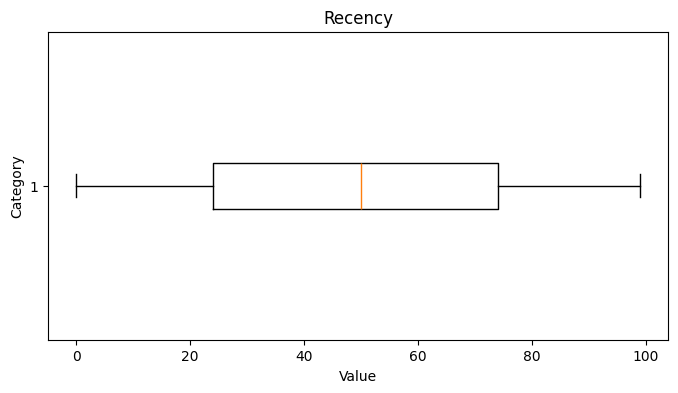

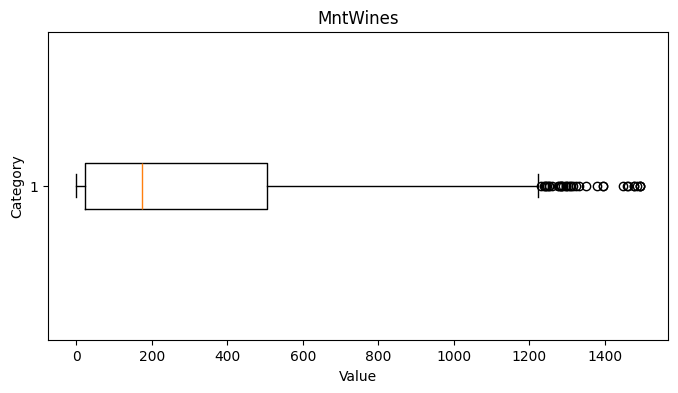

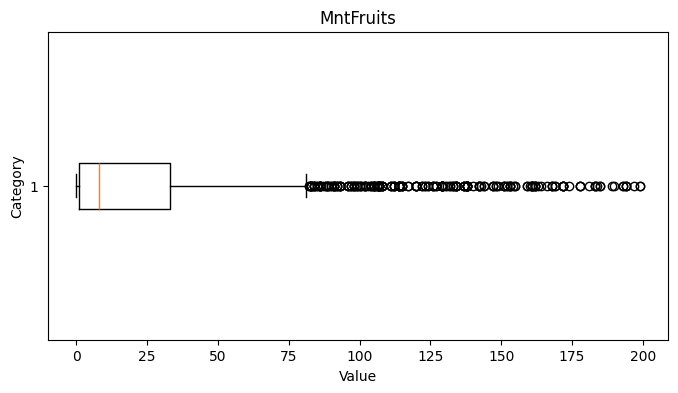

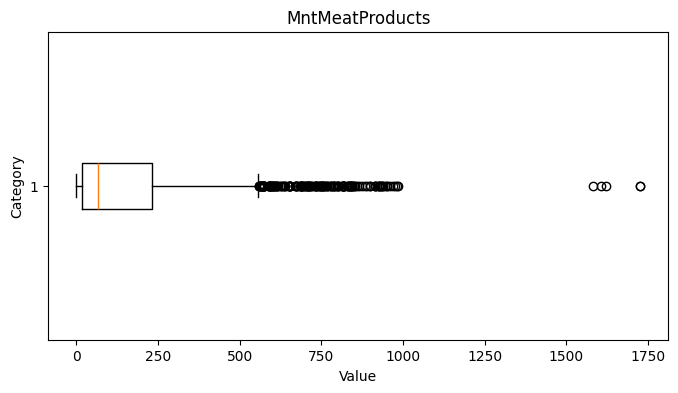

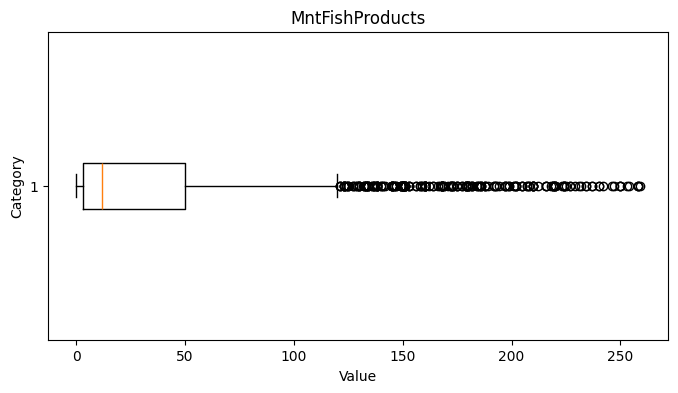

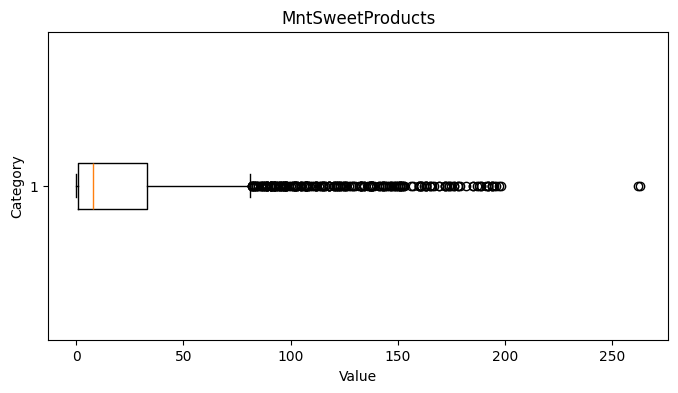

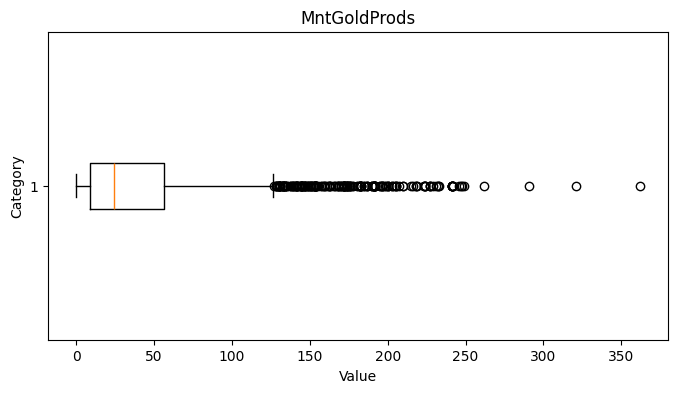

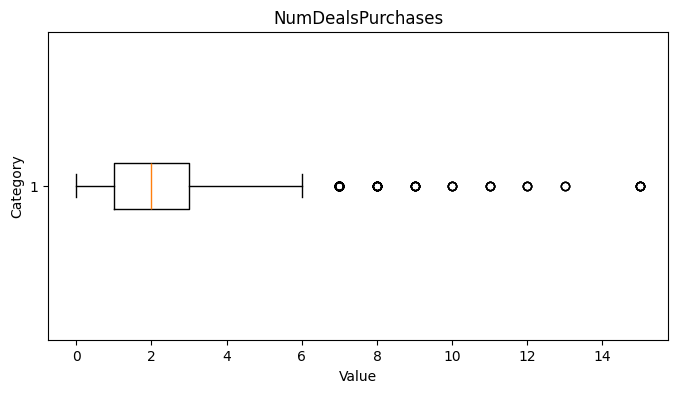

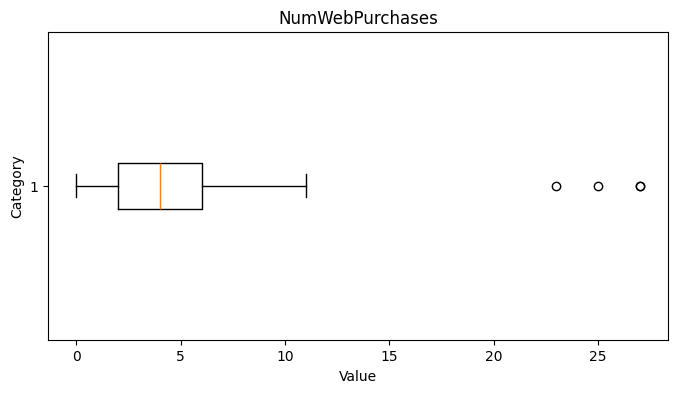

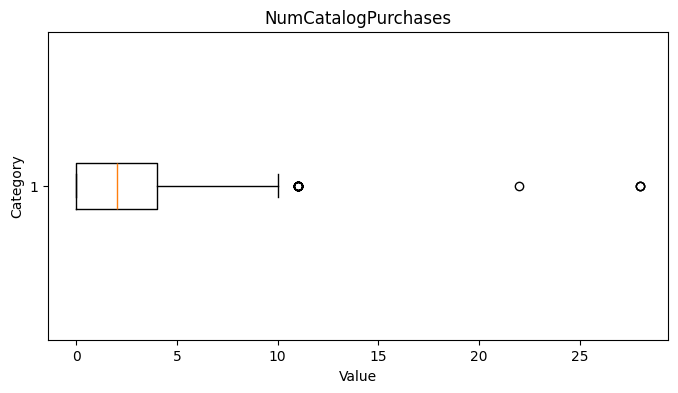

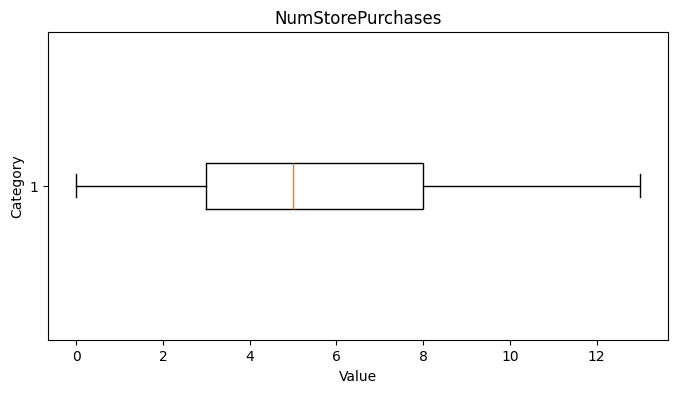

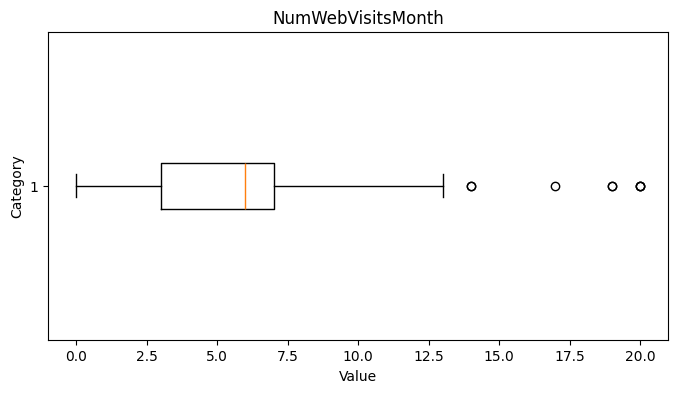

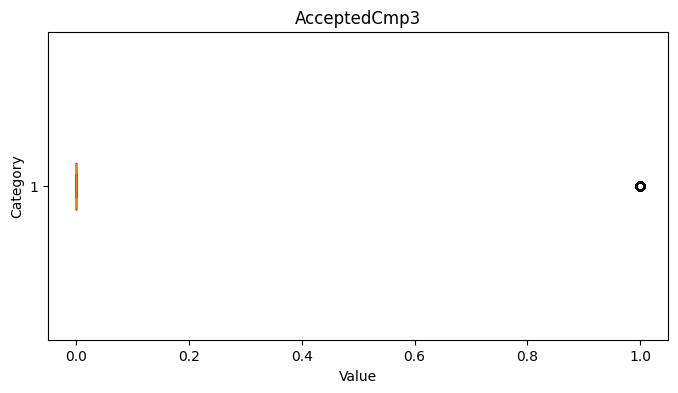

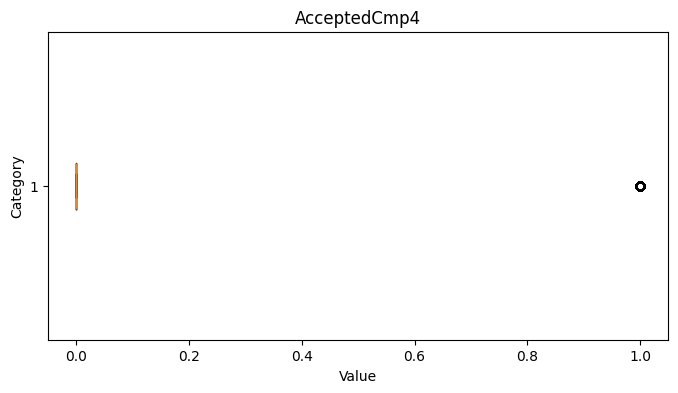

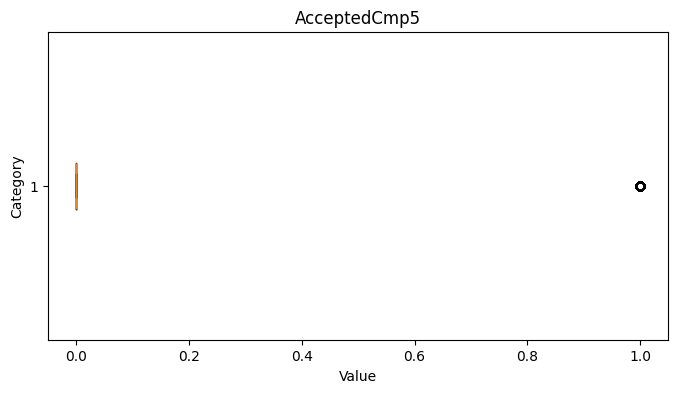

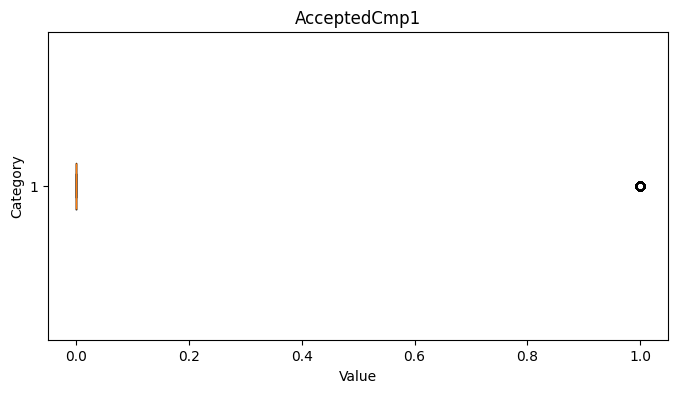

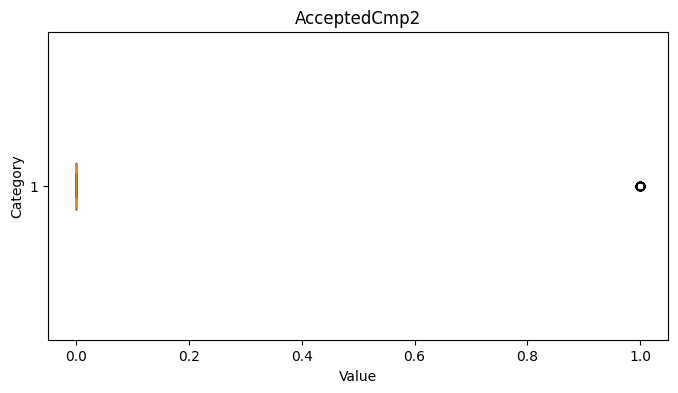

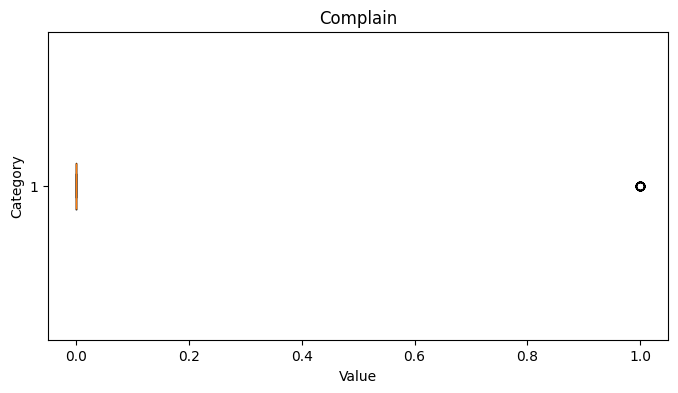

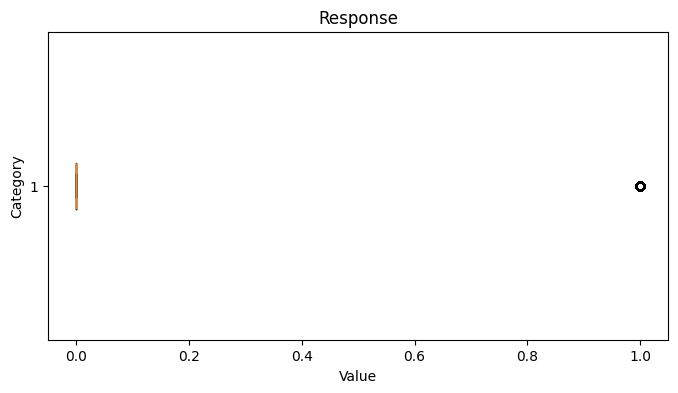

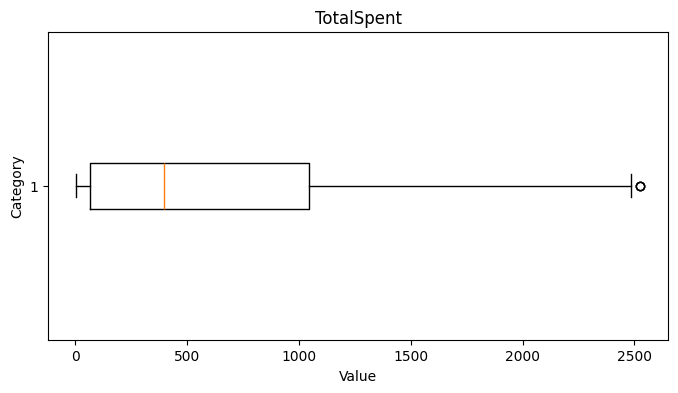

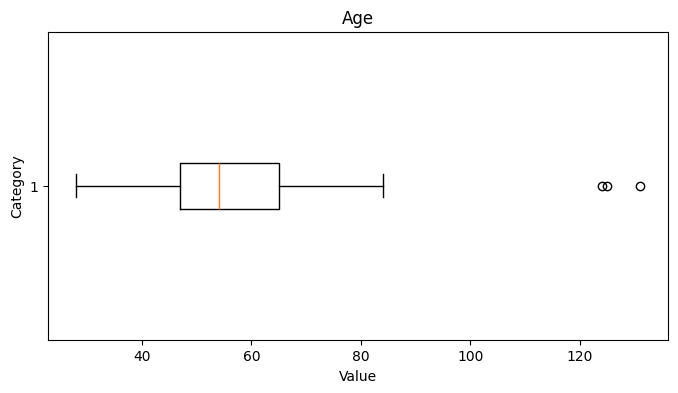

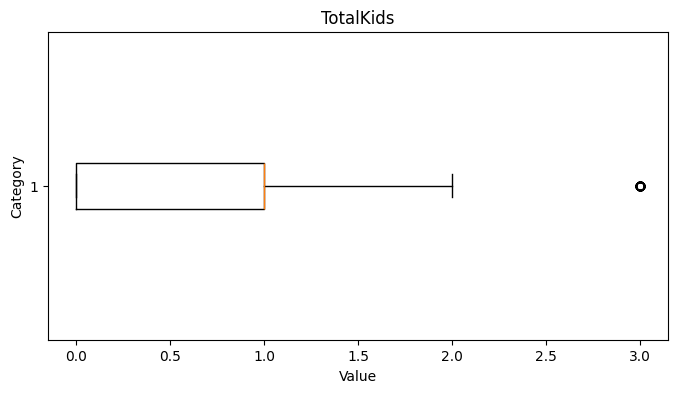

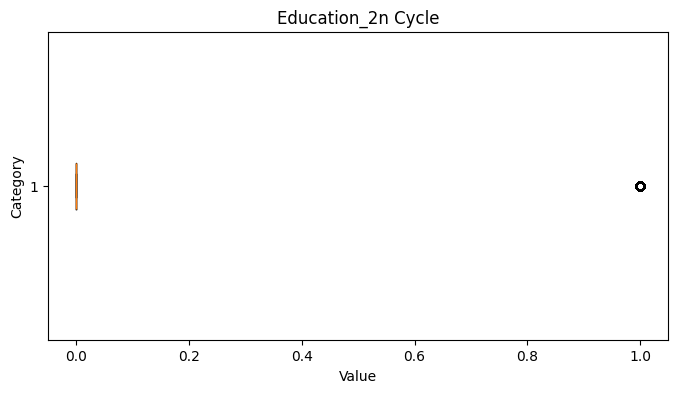

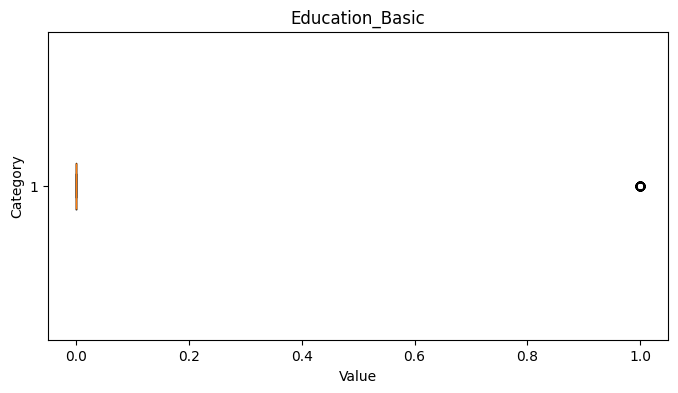

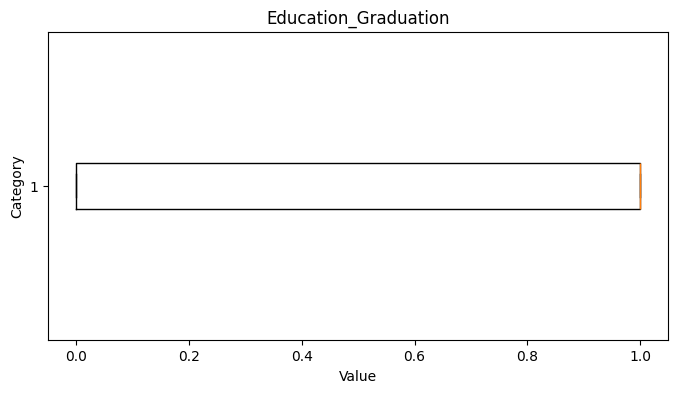

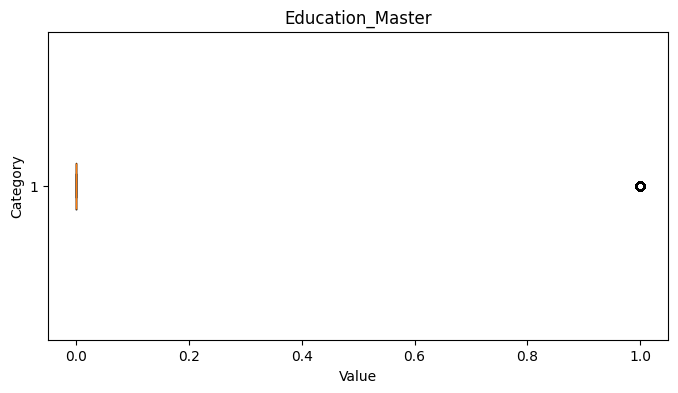

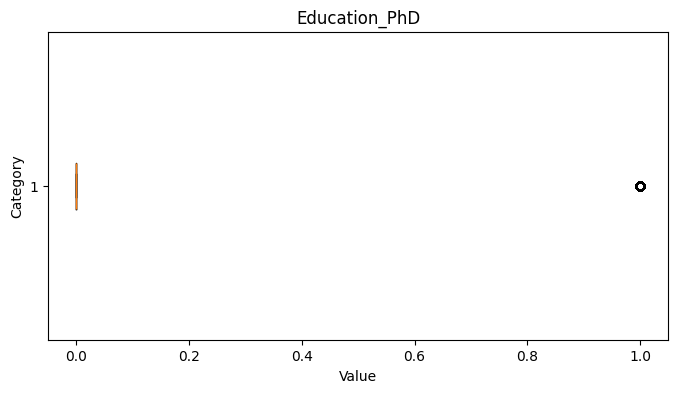

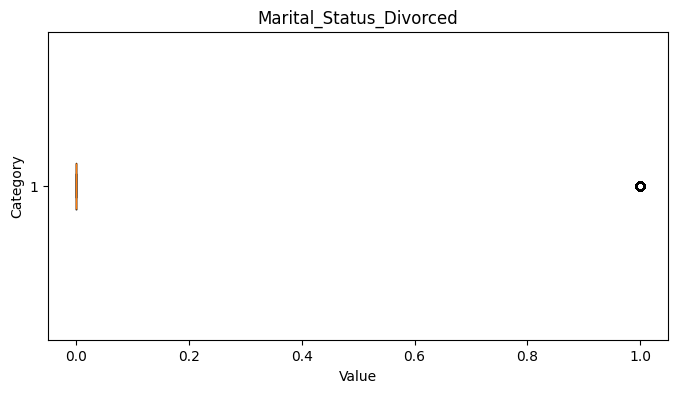

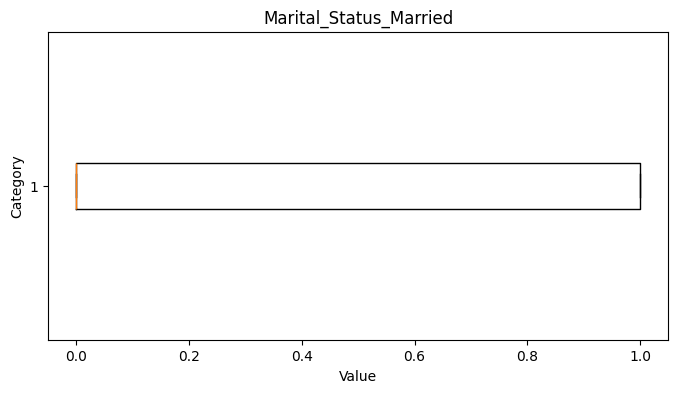

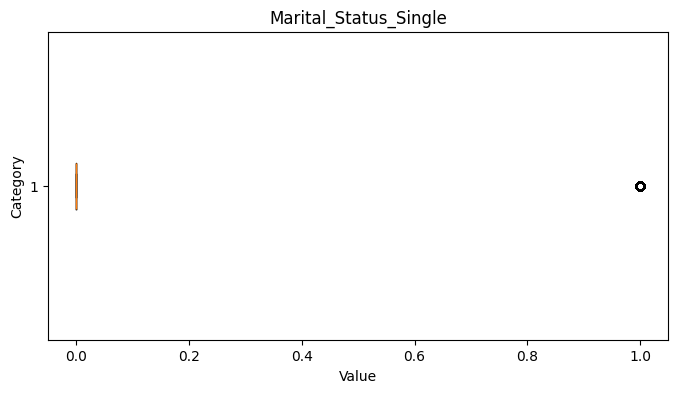

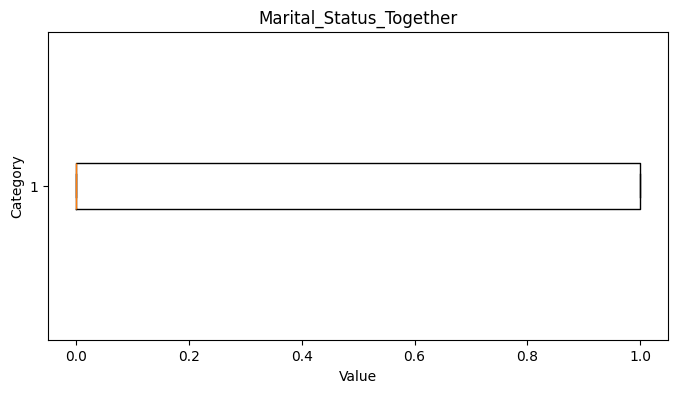

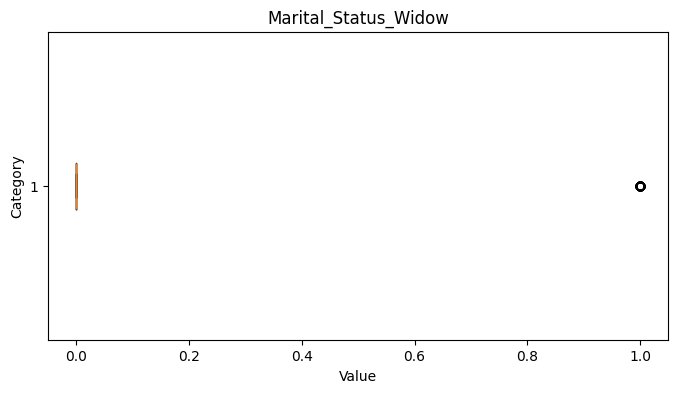

In [19]:
# Using box plot to detect outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64','int32']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 4))  # Adjust figure size for each plot
    plt.boxplot(df[column], vert=False)
    plt.title(column)  # Set title as column name
    plt.xlabel("Value")
    plt.ylabel("Category")
    plt.show()

In [20]:
# writing a function to find upper amd lower extremes
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme

In [21]:
outlier_detection(df,'Income')

(-13666.5, 117505.5)

In [22]:
df.loc[df['Income']>117416.25,'Income'] = 117416.25

In [23]:
outlier_detection(df,'MntWines')

(-697.5, 1226.5)

In [24]:
outlier_detection(df,'MntFruits')

(-47.0, 81.0)

In [25]:
outlier_detection(df,'MntMeatProducts')

(-308.0, 556.0)

In [26]:
outlier_detection(df,'MntFishProducts')

(-67.5, 120.5)

In [27]:
outlier_detection(df,'MntSweetProducts')

(-47.0, 81.0)

In [28]:
outlier_detection(df,'MntGoldProds')

(-61.5, 126.5)

In [29]:
outlier_detection(df,'NumDealsPurchases')

(-2.0, 6.0)

In [30]:
outlier_detection(df,'NumWebPurchases')

(-4.0, 12.0)

In [31]:
outlier_detection(df,'NumCatalogPurchases')

(-6.0, 10.0)

In [32]:
outlier_detection(df,'NumWebVisitsMonth')

(-3.0, 13.0)

In [33]:
#outlier_detection(df,'Year_Birth')

In [34]:
# Capping the outliers

df.loc[df['MntWines']>1225.0,'MntWines'] = 1225.0
df.loc[df['MntFruits']>81.0,'MntFruits'] = 81.0
df.loc[df['MntMeatProducts']>556.0,'MntMeatProducts'] = 556.0
df.loc[df['MntFishProducts']>120,'MntFishProducts'] = 120
df.loc[df['MntSweetProducts']>81.0,'MntSweetProducts'] = 81.0
df.loc[df['MntGoldProds']>126,'MntGoldProds'] = 126
df.loc[df['NumDealsPurchases']>6.0,'NumDealsPurchases'] = 6.0
df.loc[df['NumWebPurchases']>12.0,'NumWebPurchases'] = 12.0
df.loc[df['NumCatalogPurchases']>10.0,'NumCatalogPurchases'] = 10.0
df.loc[df['NumWebVisitsMonth']>13.0,'NumWebVisitsMonth'] = 13.0
#df.loc[df['Year_Birth']<1932,'Year_Birth'] = 1932

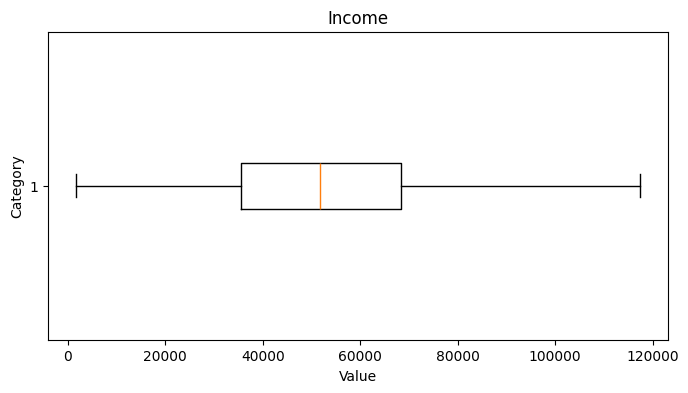

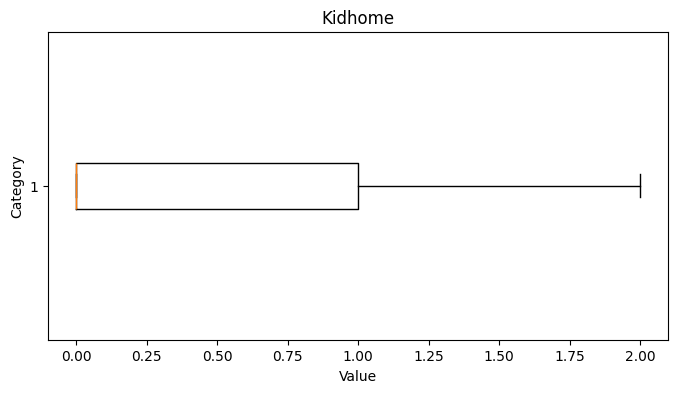

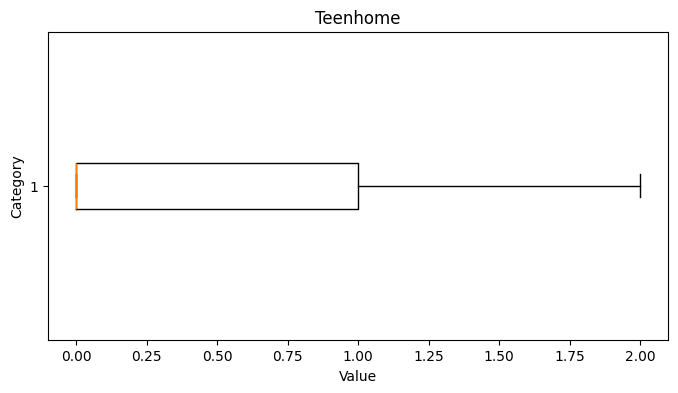

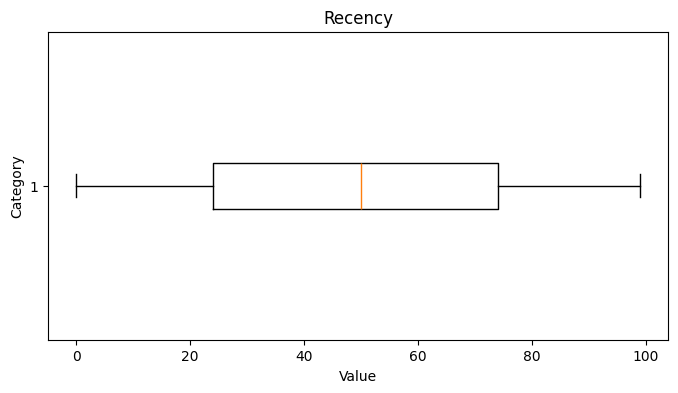

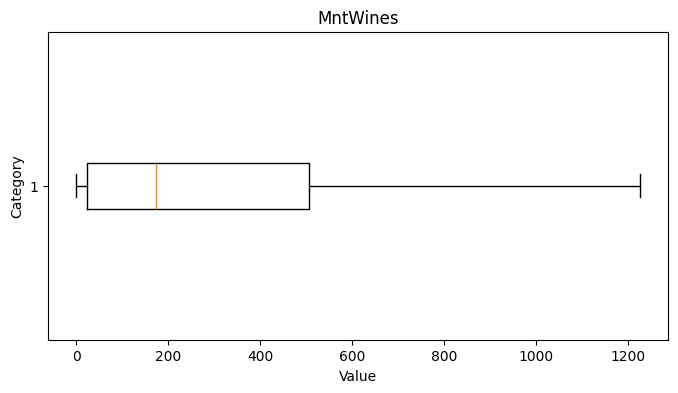

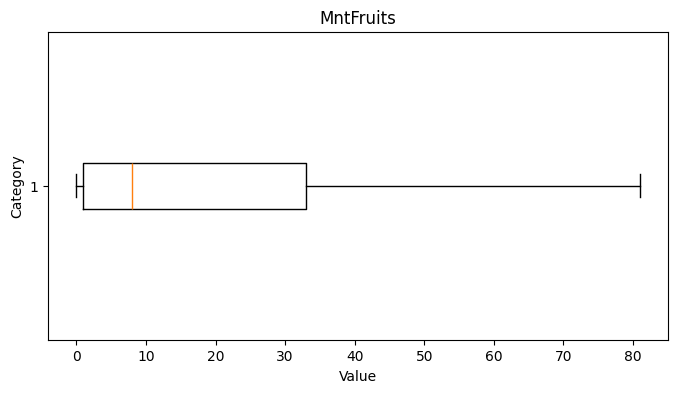

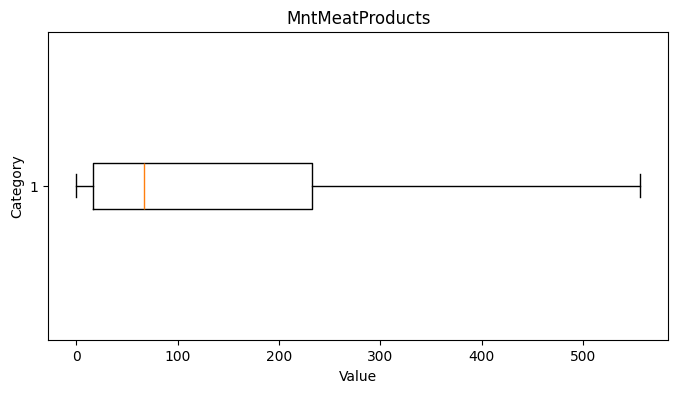

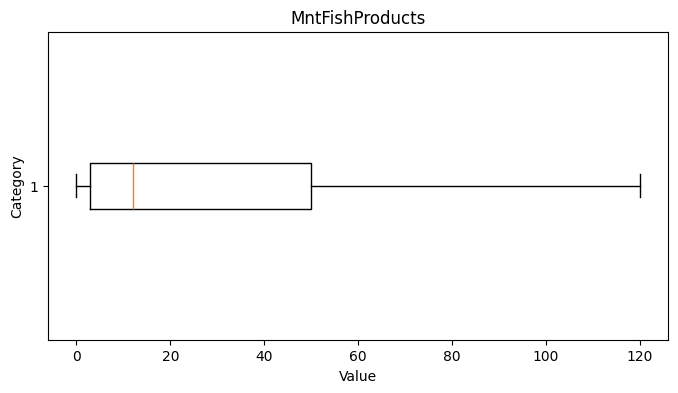

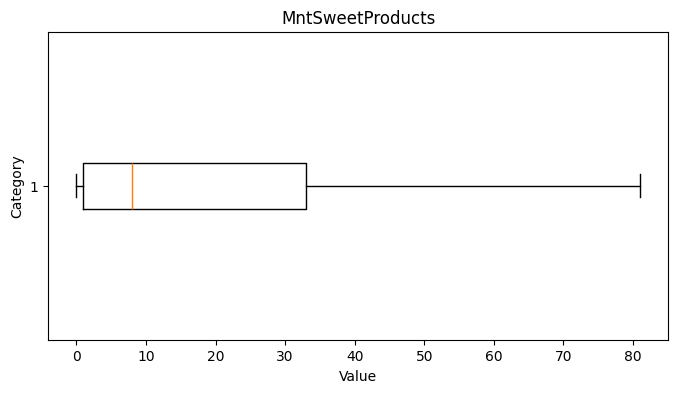

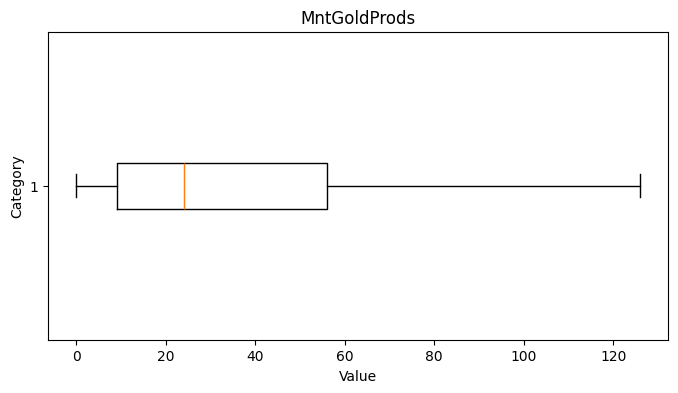

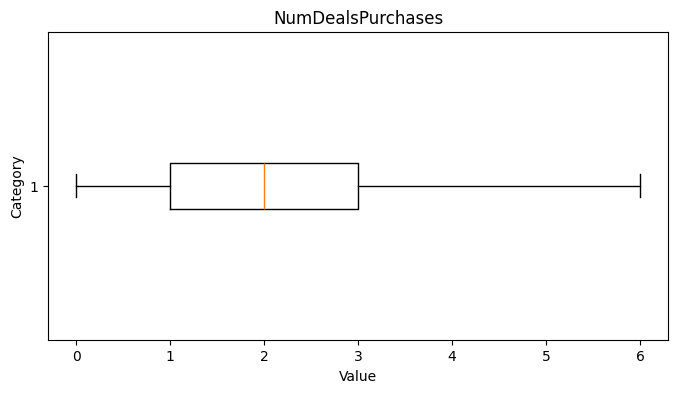

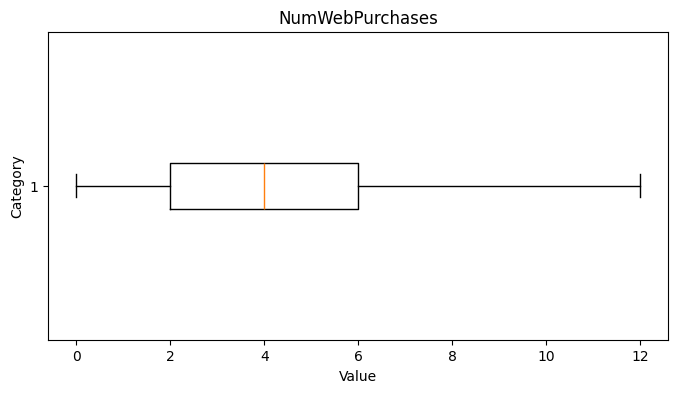

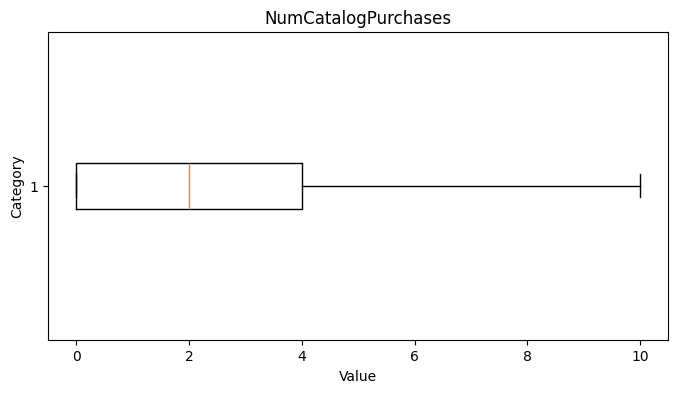

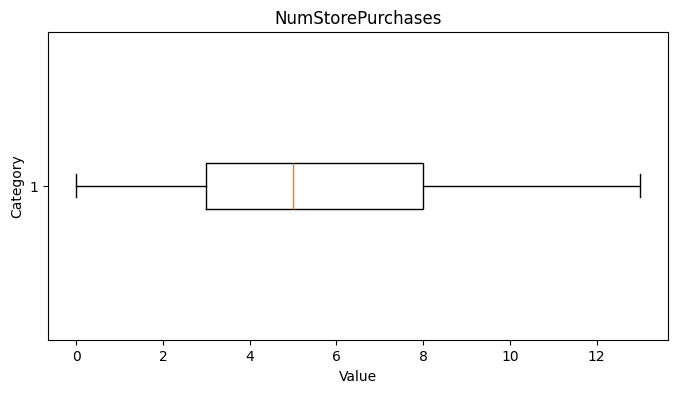

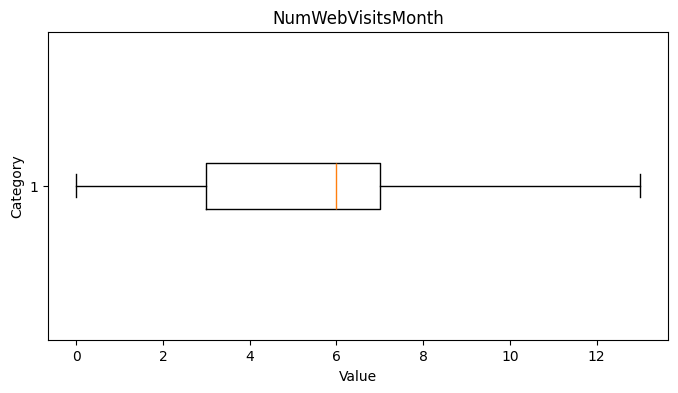

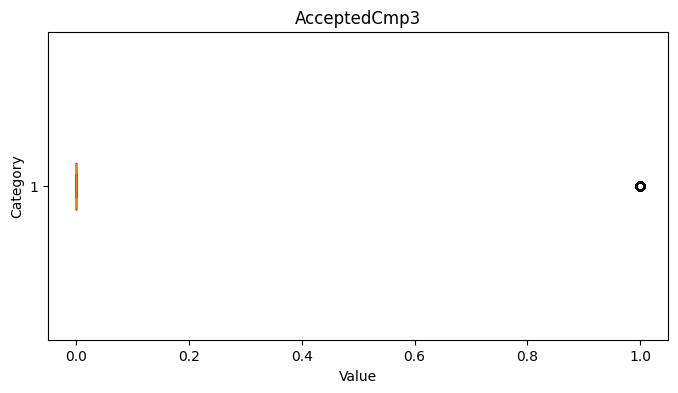

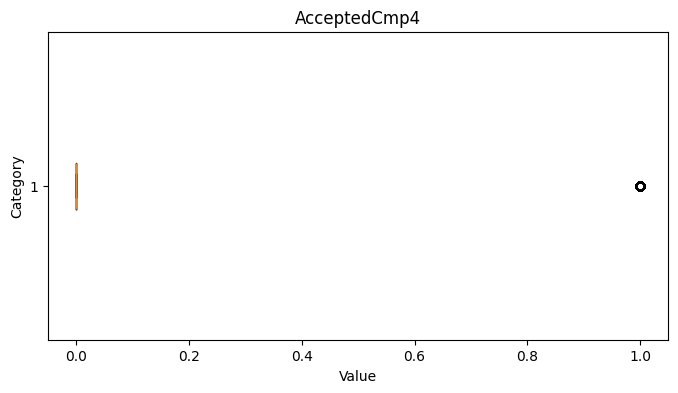

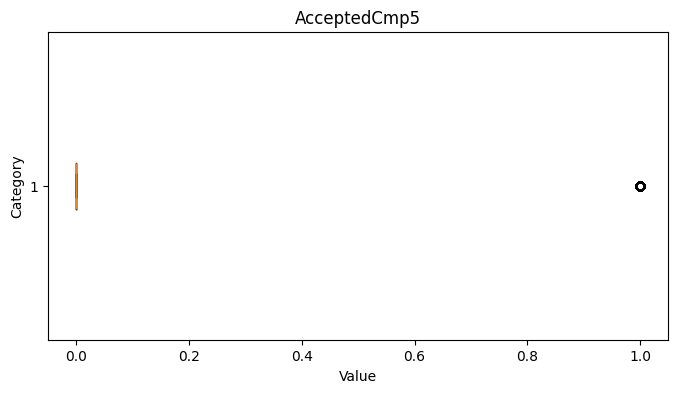

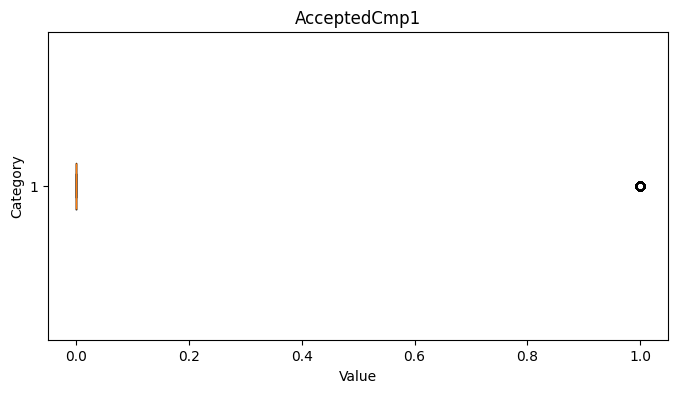

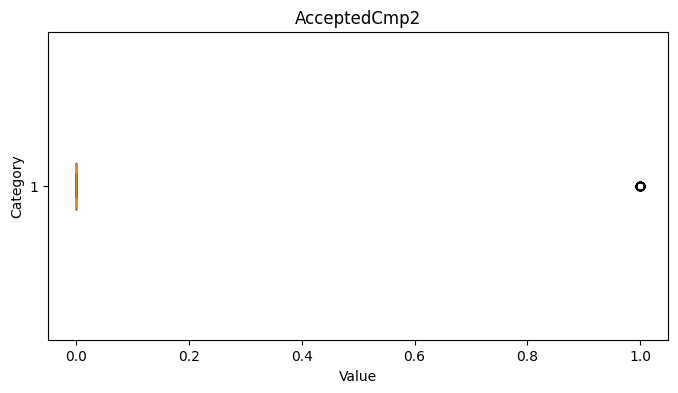

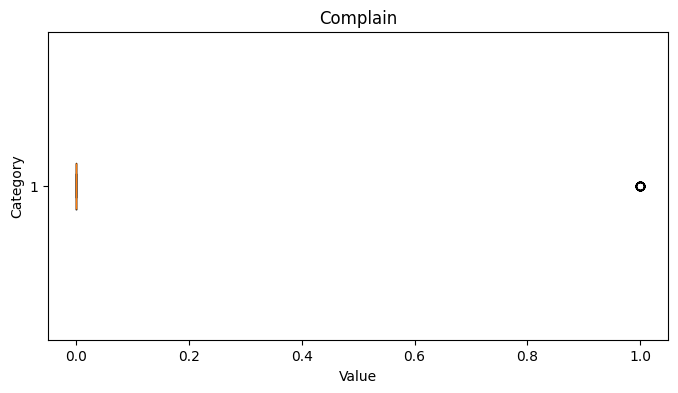

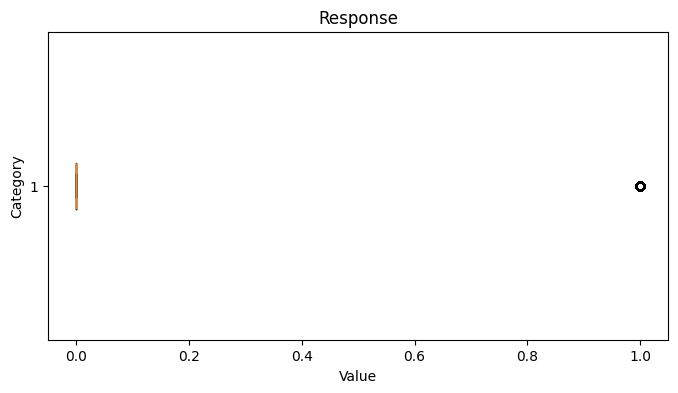

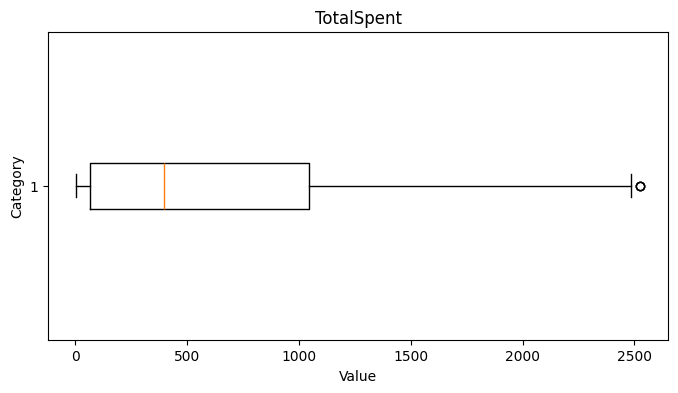

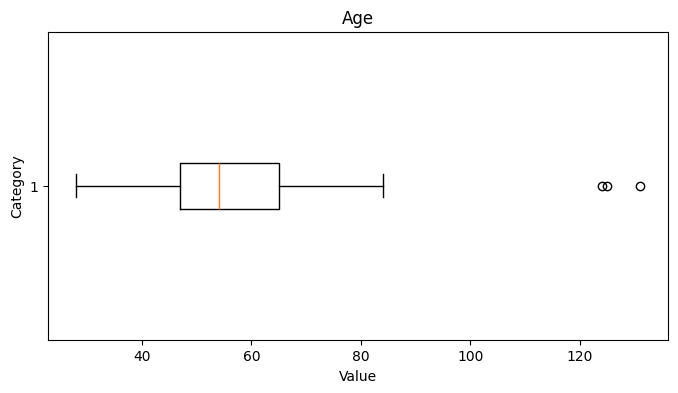

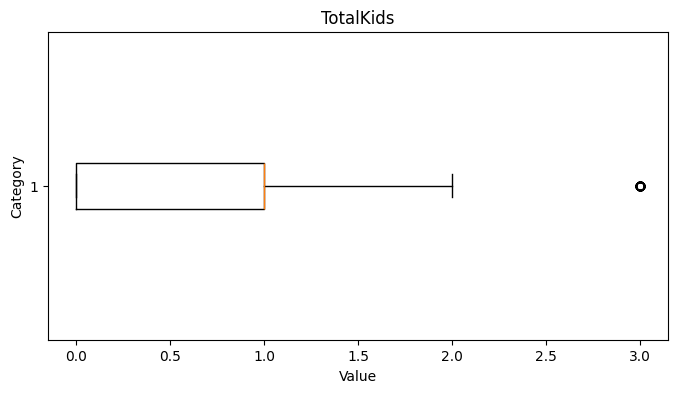

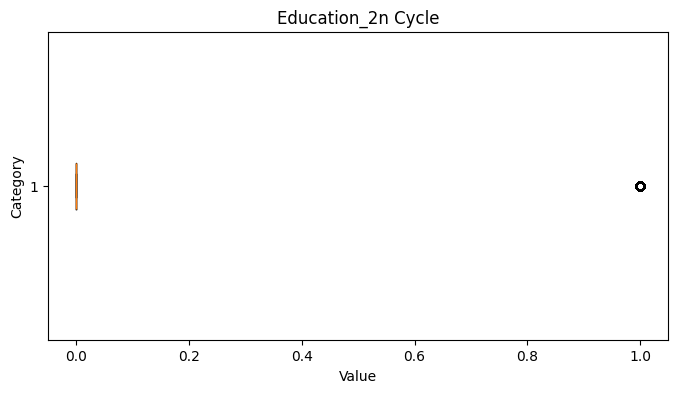

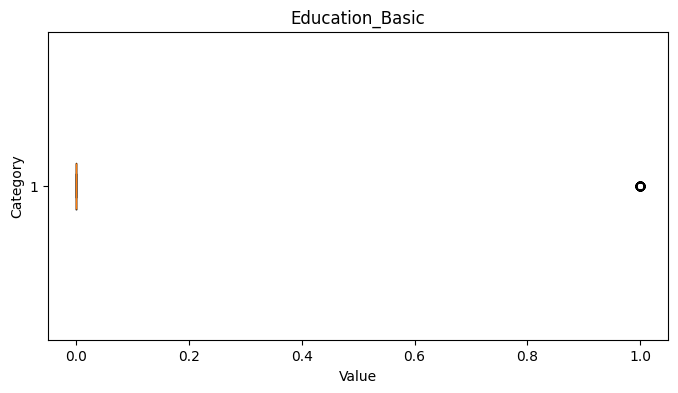

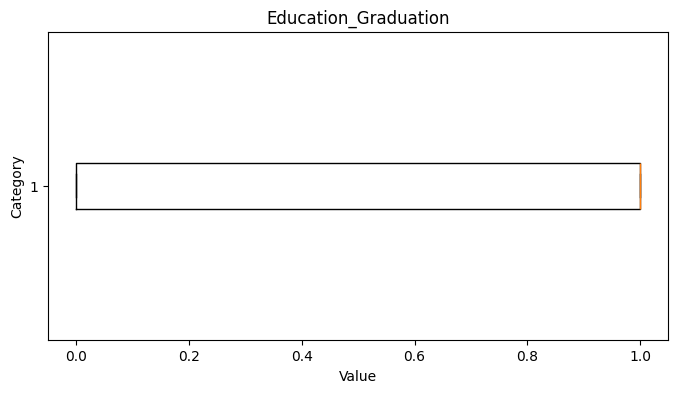

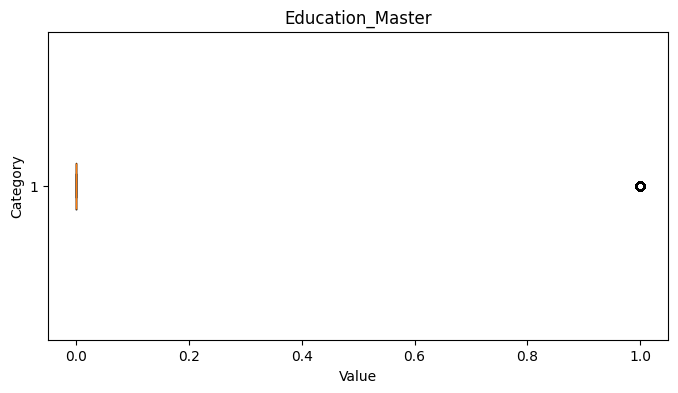

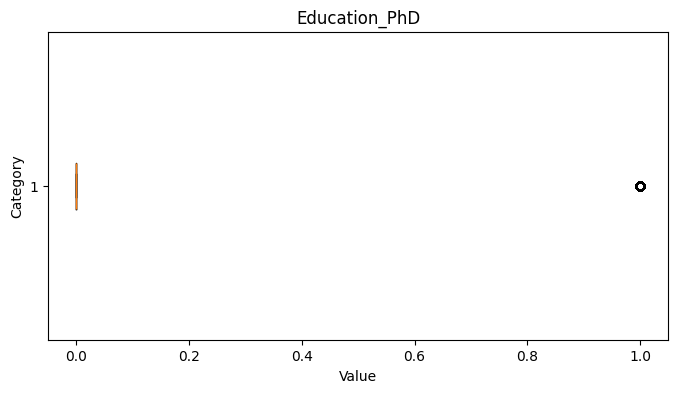

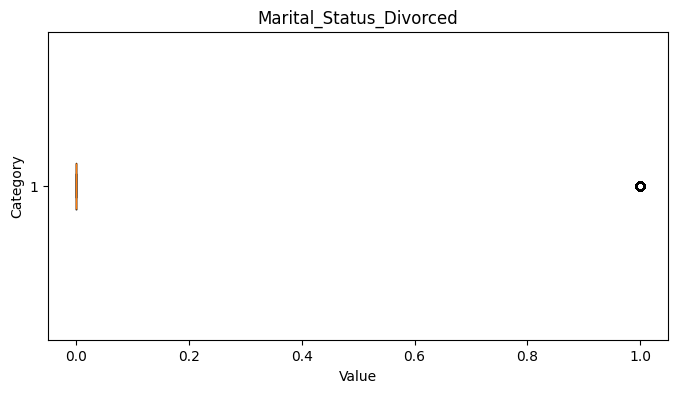

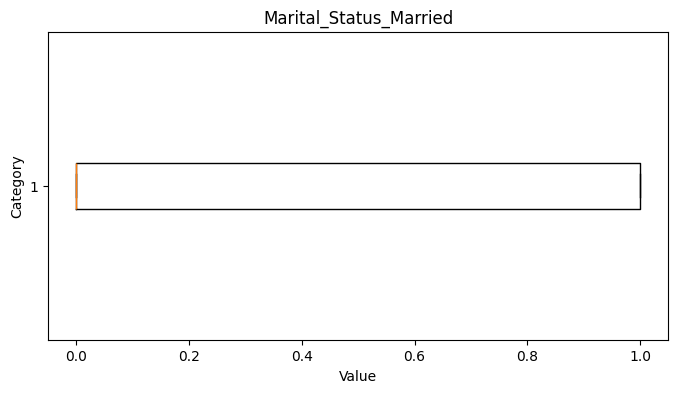

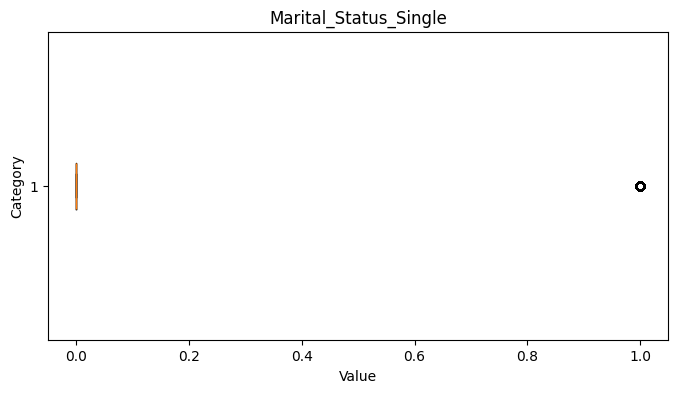

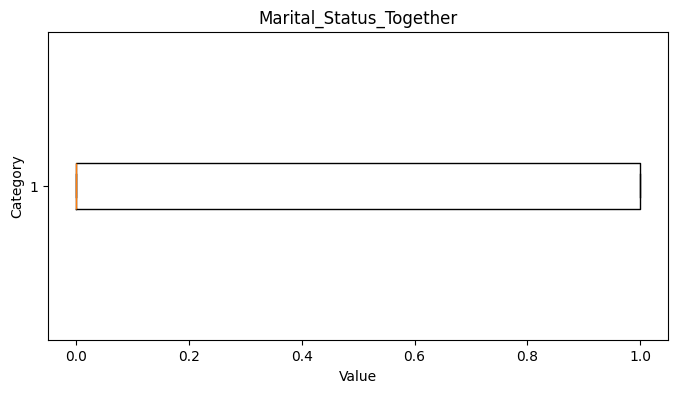

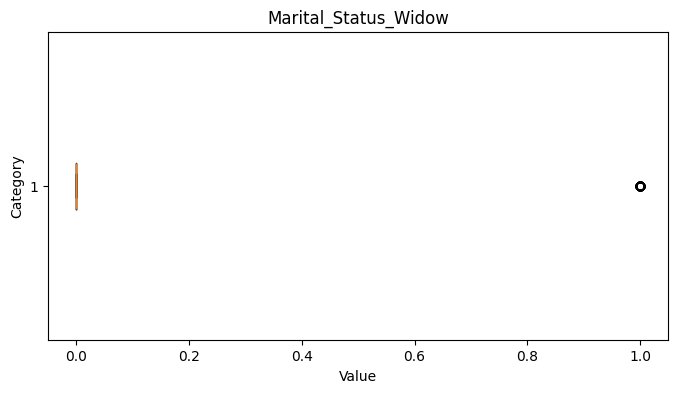

In [35]:
# checking again to see if there are any outliers

for column in numerical_columns:
    plt.figure(figsize=(8, 4))  # Adjust figure size for each plot
    plt.boxplot(df[column], vert=False)
    plt.title(column)  # Set title as column name
    plt.xlabel("Value")
    plt.ylabel("Category")
    plt.show()

### 4. Univariate Analysis
Explore individual variables.

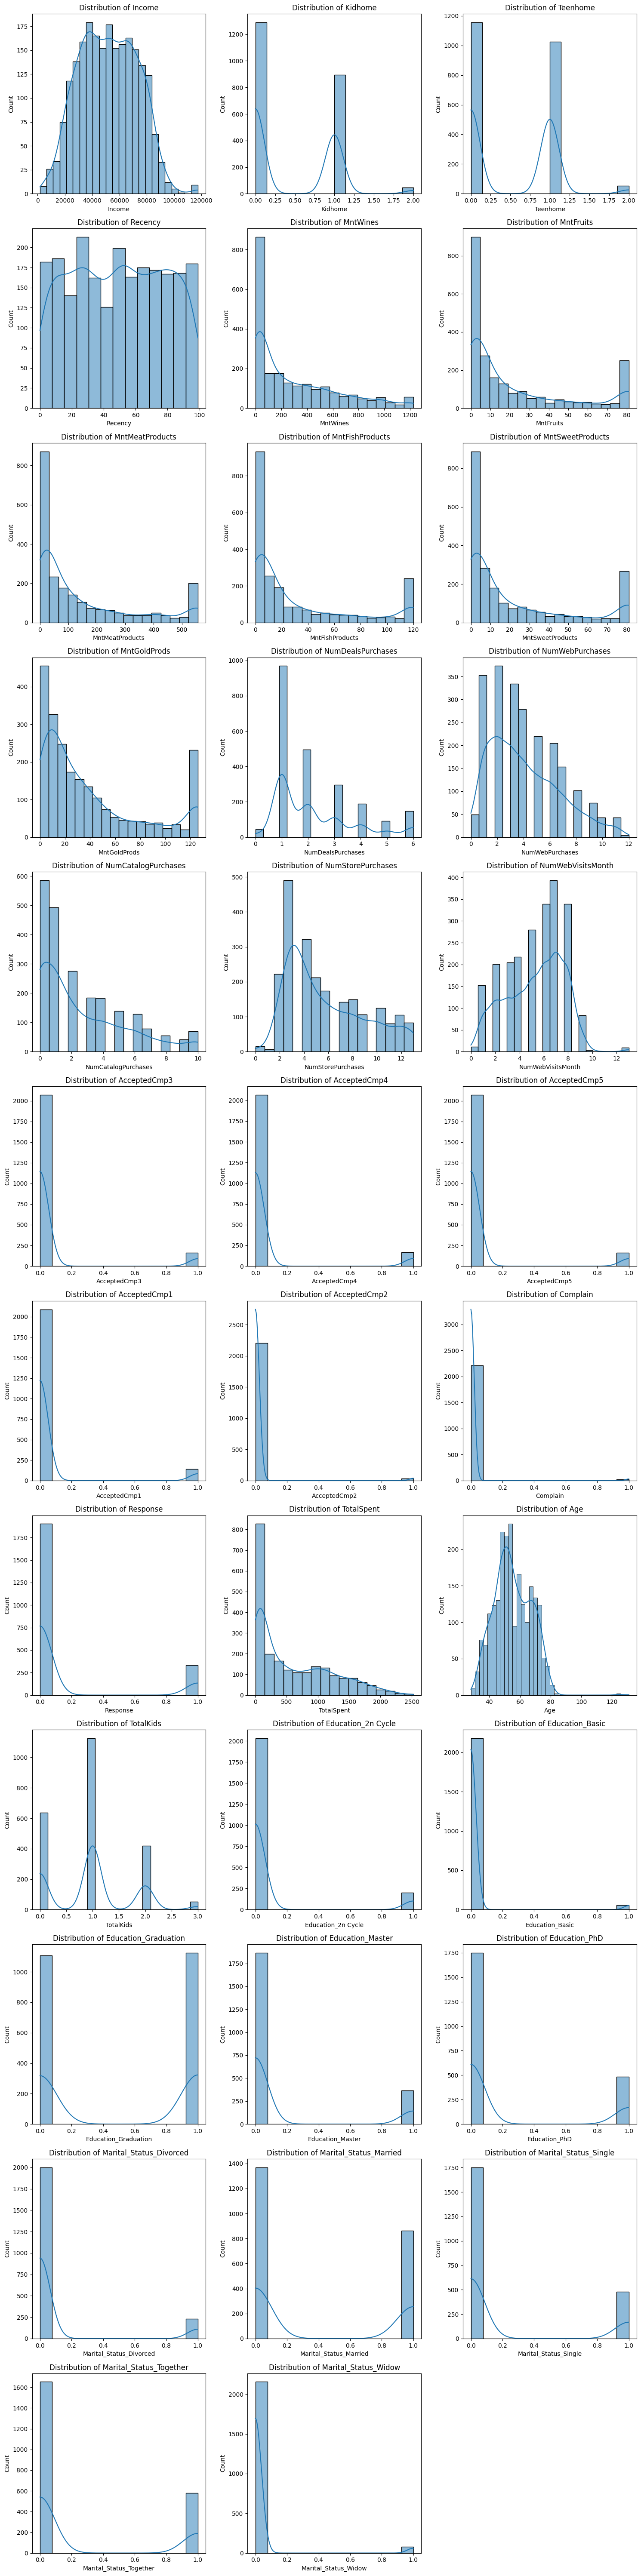

In [36]:
# Calculate the number of rows and columns needed for the subplots

num_numerical_columns = len(df.columns)
num_cols = 3
num_rows = math.ceil(num_numerical_columns / num_cols)

# Plotting histograms for numerical columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 5. Bivariate Analysis
Examine relationships between pairs of variables.

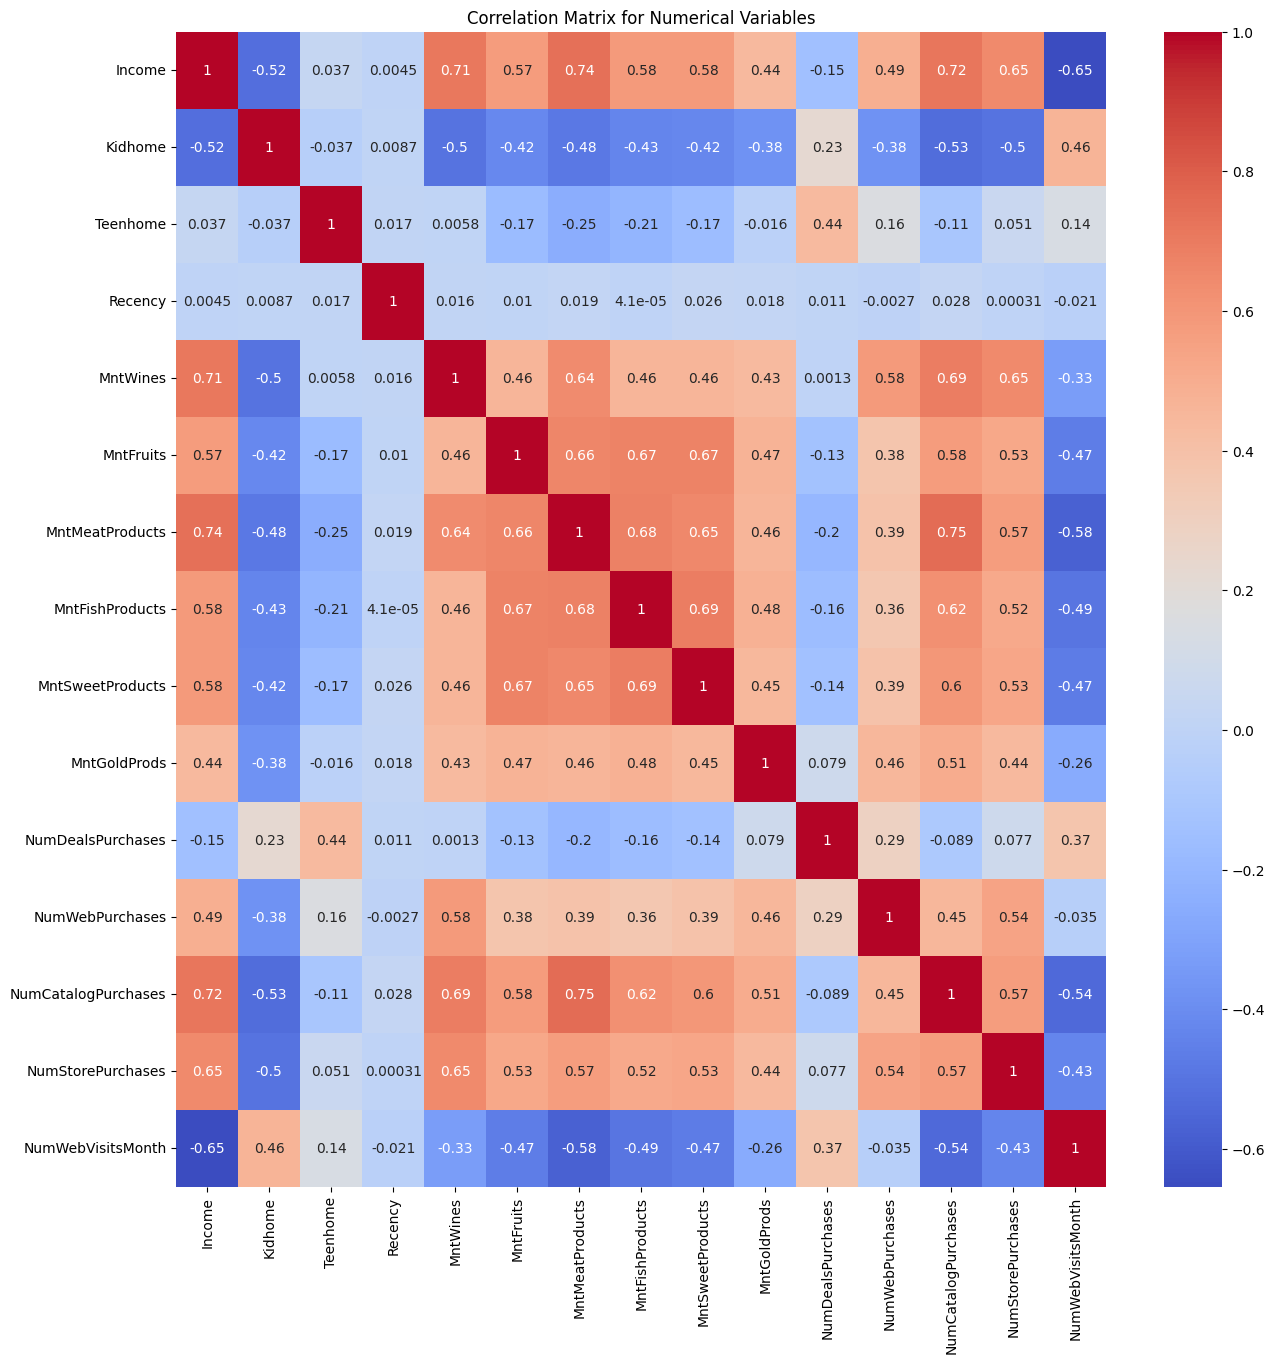

In [37]:
# Correlation matrix for numerical columns
numerical_columns = ['Income', 'Kidhome', 'Teenhome', 'Recency', 
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
            'NumWebVisitsMonth']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

In [38]:
# Box plots to understand the distribution of numerical variables based on categorical features

#categorical_columns = df.select_dtypes(include=['object']).columns
'''for col in categorical_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x=col, y=num_col)
        plt.title(f'{num_col} by {col}')
        plt.xticks(rotation=45)
        plt.show()'''

"for col in categorical_columns:\n    for num_col in numerical_columns:\n        plt.figure(figsize=(10, 5))\n        sns.boxplot(data=df, x=col, y=num_col)\n        plt.title(f'{num_col} by {col}')\n        plt.xticks(rotation=45)\n        plt.show()"

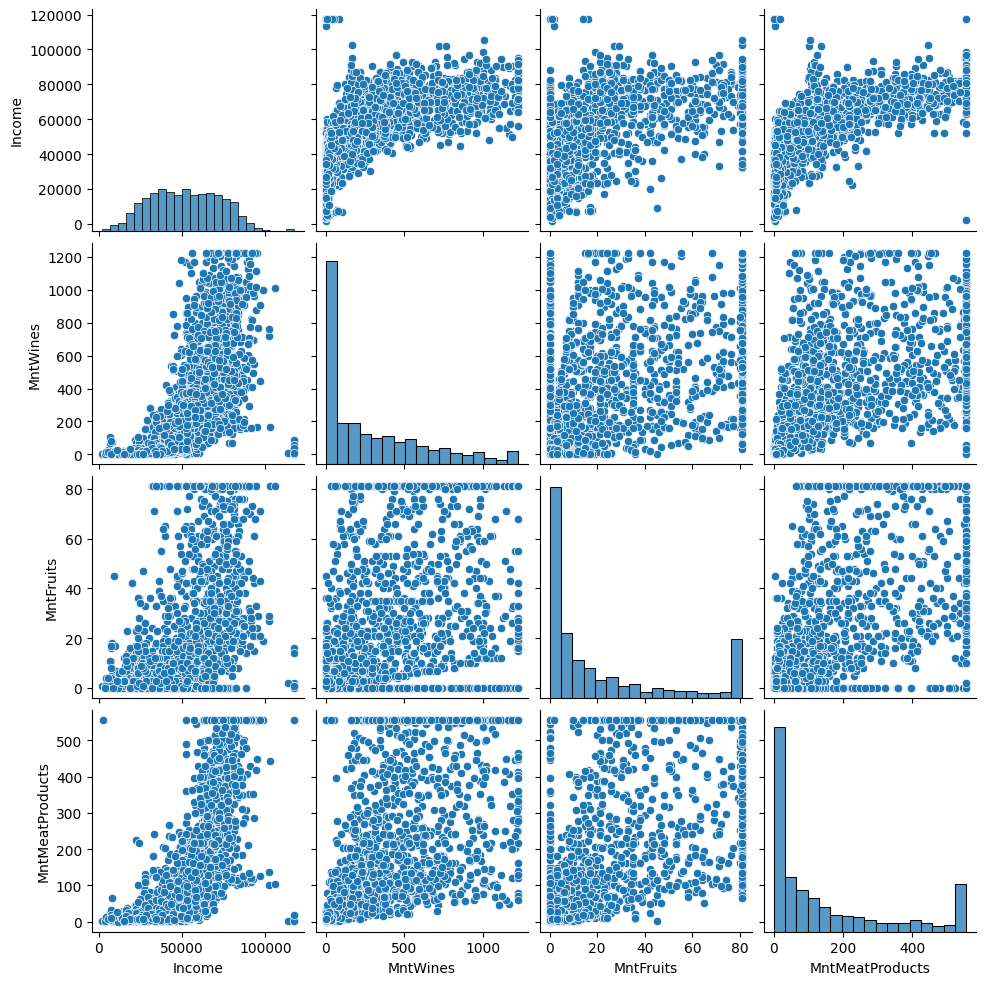

In [39]:
# Scatter plots for some interesting pairs
sns.pairplot(df, vars=['Income', 'MntWines', 'MntFruits', 'MntMeatProducts'])
plt.show()

# Data Pre-processing

### Applying Standardization methods

In [40]:
# Scale the data
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(df)

scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(df)

## PCA

In [41]:
# Apply PCA
pca = PCA(n_components=2)
X_standard_pca = pca.fit_transform(X_standard_scaled)
X_minmax_pca = pca.fit_transform(X_minmax_scaled)

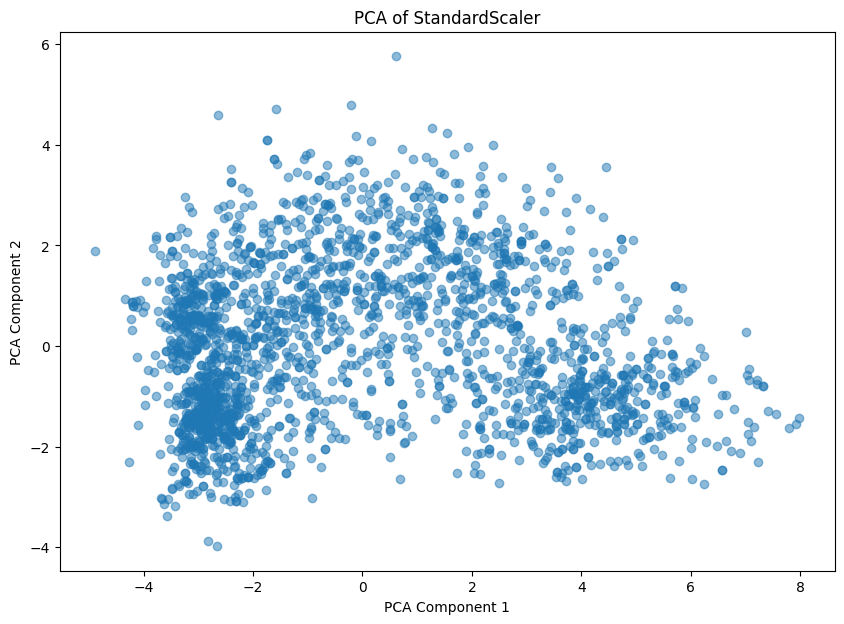

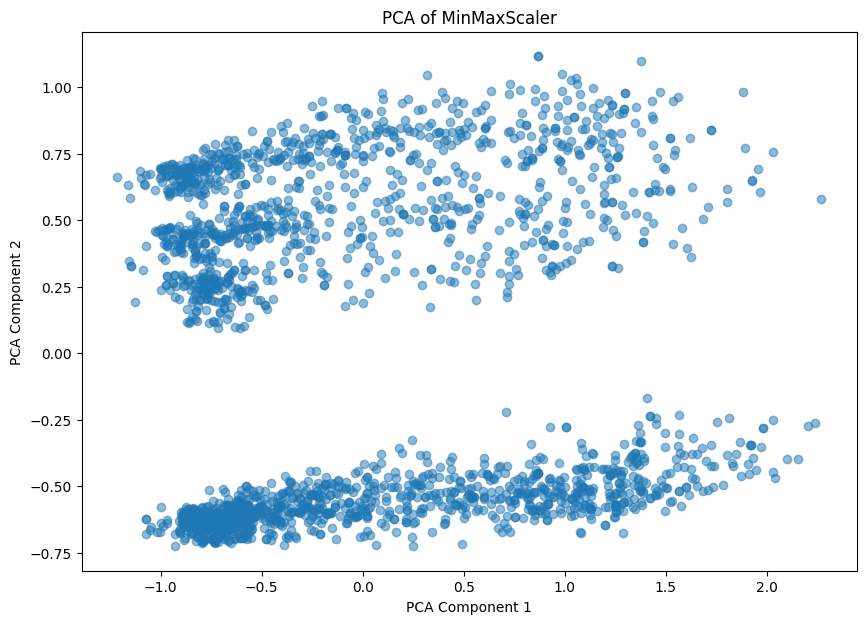

In [42]:
# Plot the PCA components
plt.figure(figsize=(10, 7))
plt.scatter(X_standard_pca[:, 0], X_standard_pca[:, 1], cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of StandardScaler')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X_minmax_pca[:, 0], X_minmax_pca[:, 1], cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of MinMaxScaler')
plt.show()

# Model building
### Before hypertuning

In [43]:
# Define models
models = {
    'KMeans_Standard': KMeans(n_clusters=5),
    'Agglomerative_Standard': AgglomerativeClustering(n_clusters=5),
    'DBSCAN_Standard': DBSCAN(eps=0.5),
    'KMeans_MinMax': KMeans(n_clusters=5),
    'Agglomerative_MinMax': AgglomerativeClustering(n_clusters=5),
    'DBSCAN_MinMax': DBSCAN(eps=0.5),
}

In [44]:
# Fit models and calculate silhouette scores
results = {}
for name, model in models.items():
    if 'Standard' in name:
        X_pca = X_standard_pca
    else:
        X_pca = X_minmax_pca
    model.fit(X_pca)
    if hasattr(model, 'labels_'):
        labels = model.labels_
    else:
        labels = model.predict(X_pca)
    if len(set(labels)) > 1:  # Ensure at least 2 clusters
        score = silhouette_score(X_pca, labels)
        results[name] = score

In [45]:
# Print results
for name, score in results.items():
    print(f'{name}: Silhouette Score = {score}')

KMeans_Standard: Silhouette Score = 0.39761021218878073
Agglomerative_Standard: Silhouette Score = 0.3598625439182597
DBSCAN_Standard: Silhouette Score = 0.15183994503541076
KMeans_MinMax: Silhouette Score = 0.571971108714597
Agglomerative_MinMax: Silhouette Score = 0.5583894662213268


In [46]:
# Select the best model
best_model_name = max(results, key=results.get)
print(f'Best Model: {best_model_name} with Silhouette Score = {results[best_model_name]}')

Best Model: KMeans_MinMax with Silhouette Score = 0.571971108714597


In [47]:
# Fit the best model to the entire dataset
best_model = models[best_model_name]
if 'Standard' in best_model_name:
    best_model.fit(X_standard_scaled)
else:
    best_model.fit(X_minmax_scaled)

## After Hyper-parameter tuning
### Kmeans

In [48]:
# Parameter grid for KMeans
param_grid_kmeans = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    #'n_init' : [10, 20, 30, 40, 50]
}

# Function to perform grid search for KMeans
def grid_search_kmeans(X, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        model = KMeans(**params)
        model.fit(X)
        labels = model.labels_
        if len(set(labels)) > 1:  # Ensure at least 2 clusters
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = params
    return best_score, best_params

# Perform grid search for both scalers
best_kmeans_score_standard, best_kmeans_params_standard = grid_search_kmeans(X_standard_pca, param_grid_kmeans)
best_kmeans_score_minmax, best_kmeans_params_minmax = grid_search_kmeans(X_minmax_pca, param_grid_kmeans)

print(f"Best KMeans params (StandardScaler): {best_kmeans_params_standard}, Silhouette Score: {best_kmeans_score_standard}")
print(f"Best KMeans params (MinMaxScaler): {best_kmeans_params_minmax}, Silhouette Score: {best_kmeans_score_minmax}")

Best KMeans params (StandardScaler): {'n_clusters': 2}, Silhouette Score: 0.5326229459232776
Best KMeans params (MinMaxScaler): {'n_clusters': 4}, Silhouette Score: 0.5877576063608574


### Agglomerative Clustering

In [49]:
# Parameter grid for Agglomerative Clustering
param_grid_agg = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'linkage': ['ward', 'complete', 'average', 'single']
}

# Function to perform grid search for Agglomerative Clustering
def grid_search_agg(X, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        model = AgglomerativeClustering(**params)
        model.fit(X)
        labels = model.labels_
        if len(set(labels)) > 1:  # Ensure at least 2 clusters
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = params
    return best_score, best_params

# Perform grid search for both scalers
best_agg_score_standard, best_agg_params_standard = grid_search_agg(X_standard_pca, param_grid_agg)
best_agg_score_minmax, best_agg_params_minmax = grid_search_agg(X_minmax_pca, param_grid_agg)

print(f"Best Agglomerative Clustering params (StandardScaler): {best_agg_params_standard}, Silhouette Score: {best_agg_score_standard}")
print(f"Best Agglomerative Clustering params (MinMaxScaler): {best_agg_params_minmax}, Silhouette Score: {best_agg_score_minmax}")

Best Agglomerative Clustering params (StandardScaler): {'linkage': 'complete', 'n_clusters': 2}, Silhouette Score: 0.5148439047650218
Best Agglomerative Clustering params (MinMaxScaler): {'linkage': 'average', 'n_clusters': 4}, Silhouette Score: 0.5753449149502823


### DBSCAN

In [50]:
# Parameter grid for DBSCAN
param_grid_dbscan = {
    'eps': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'min_samples': [3, 4, 5, 7, 10]
}

# Function to perform grid search for DBSCAN
def grid_search_dbscan(X, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        model = DBSCAN(**params)
        model.fit(X)
        labels = model.labels_
        if len(set(labels)) > 1:  # Ensure at least 2 clusters
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = params
    return best_score, best_params

# Perform grid search for both scalers
best_dbscan_score_standard, best_dbscan_params_standard = grid_search_dbscan(X_standard_pca, param_grid_dbscan)
best_dbscan_score_minmax, best_dbscan_params_minmax = grid_search_dbscan(X_minmax_pca, param_grid_dbscan)

print(f"Best DBSCAN params (StandardScaler): {best_dbscan_params_standard}, Silhouette Score: {best_dbscan_score_standard}")
print(f"Best DBSCAN params (MinMaxScaler): {best_dbscan_params_minmax}, Silhouette Score: {best_dbscan_score_minmax}")

Best DBSCAN params (StandardScaler): {'eps': 0.7, 'min_samples': 3}, Silhouette Score: 0.32469408509301056
Best DBSCAN params (MinMaxScaler): {'eps': 0.3, 'min_samples': 3}, Silhouette Score: 0.39994655890097647


In [51]:
# Compile results
results_ht = {
    'KMeans_Standard': best_kmeans_score_standard,
    'Agglomerative_Standard': best_agg_score_standard,
    'DBSCAN_Standard': best_dbscan_score_standard,
    'KMeans_MinMax': best_kmeans_score_minmax,
    'Agglomerative_MinMax': best_agg_score_minmax,
    'DBSCAN_MinMax': best_dbscan_score_minmax
}

### Silhouette Score after hyper-parameter tuning

In [52]:
# Print comparison of all models
for model, score in results_ht.items():
    print(f'{model}: Silhouette Score = {score}')

KMeans_Standard: Silhouette Score = 0.5326229459232776
Agglomerative_Standard: Silhouette Score = 0.5148439047650218
DBSCAN_Standard: Silhouette Score = 0.32469408509301056
KMeans_MinMax: Silhouette Score = 0.5877576063608574
Agglomerative_MinMax: Silhouette Score = 0.5753449149502823
DBSCAN_MinMax: Silhouette Score = 0.39994655890097647


### Silhouette Score before hyper-parameter tuning

In [53]:
# Print comparison of all models
for model, score in results.items():
    print(f'{model}: Silhouette Score = {score}')

KMeans_Standard: Silhouette Score = 0.39761021218878073
Agglomerative_Standard: Silhouette Score = 0.3598625439182597
DBSCAN_Standard: Silhouette Score = 0.15183994503541076
KMeans_MinMax: Silhouette Score = 0.571971108714597
Agglomerative_MinMax: Silhouette Score = 0.5583894662213268


### Best model

In [54]:
# Determine the best model
best_model_name = max(results_ht, key=results_ht.get)
print(f'Best Model: {best_model_name} with Silhouette Score = {results_ht[best_model_name]}')

Best Model: KMeans_MinMax with Silhouette Score = 0.5877576063608574


## Building and Training the Best KMeans Model

In [55]:
# Initialize KMeans with the best parameters
optimal_clusters = 4

best_kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)

In [56]:
# Fit the model on the scaled data
best_kmeans_model.fit(X_minmax_pca)

KMeans(n_clusters=4, random_state=42)

In [57]:
# Predict clusters for new data points
cluster_labels = best_kmeans_model.predict(X_minmax_pca)

In [58]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X_minmax_pca, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5877282671099113


In [59]:
# Cluster centers
cluster_centers = best_kmeans_model.cluster_centers_

# Cluster labels assigned to each data point
labels = best_kmeans_model.labels_

In [60]:
"""
import joblib

# Save the model to a file
joblib.dump(best_kmeans_model, 'best_kmeans_model.pkl')

# Load the model from file
# loaded_model = joblib.load('best_kmeans_model.pkl')

"""

"\nimport joblib\n\n# Save the model to a file\njoblib.dump(best_kmeans_model, 'best_kmeans_model.pkl')\n\n# Load the model from file\n# loaded_model = joblib.load('best_kmeans_model.pkl')\n\n"

In [61]:
## Add cluster labels directly to the original dataframe as new feature
df['Cluster'] = cluster_labels

In [62]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Cluster
0,58138.0,0,0,58,635,81,546,120,81,88,...,0,1,0,0,0,0,1,0,0,2
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,0,0,0,1,0,2
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,1,0,1,0,0,0,1


In [63]:
# Calculate cluster summary
cluster_summary = df.groupby('Cluster').mean()

# Display the cluster summaries in a readable format
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}:")
    print(cluster_summary.loc[cluster])
    print("\n")

Cluster 0:
Income                     39329.900817
Kidhome                        0.686047
Teenhome                       0.558140
Recency                       49.880814
MntWines                     114.177326
MntFruits                      7.547965
MntMeatProducts               44.091570
MntFishProducts               10.840116
MntSweetProducts               7.877907
MntGoldProds                  25.802326
NumDealsPurchases              2.476744
NumWebPurchases                3.168605
NumCatalogPurchases            0.954942
NumStorePurchases              4.100291
NumWebVisitsMonth              6.404070
AcceptedCmp3                   0.065407
AcceptedCmp4                   0.045058
AcceptedCmp5                   0.002907
AcceptedCmp1                   0.010174
AcceptedCmp2                   0.004360
Complain                       0.013081
Response                       0.088663
TotalSpent                   214.328488
Age                           53.408430
TotalKids                    

## Cluster Interpretations and Insights
### <font color='blue'>Cluster 0:</font>
Demographics: Moderate number of kids and teenagers at home. Average age is around 53 years.

Income and Spending: Lower income and spending.

Engagement: Moderate store purchases, low web and catalog purchases. Low campaign acceptance and response rates.

Marital Status: Primarily married or living together.

Education: All have Graduation degrees.

#### <font color='red'>Insights:</font> 
Low-income, moderately engaged group. Marketing strategies should focus on cost-effective offers and loyalty programs.

## <font color='blue'>Cluster 1:</font>
Demographics: Similar number of kids and teenagers at home as Cluster 0. Average age is slightly higher at 55 years.

Income and Spending: Slightly higher income and spending.

Engagement: Similar purchasing behavior to Cluster 0. Slightly higher campaign response rates.

Marital Status: Diverse marital status.

Education: Diverse educational backgrounds with significant portions holding Master's and PhD degrees.

#### <font color='red'>Insights:</font> 
Slightly more affluent and educated group. Marketing strategies should include premium offers and educational content.

## <font color='blue'>Cluster 2:</font>
Demographics: Very few kids and teenagers at home. Older average age at 57 years.

Income and Spending: High income and very high spending.

Engagement: High engagement across all purchase channels. High campaign acceptance and response rates.

Marital Status: Diverse marital status.

Education: Highly educated with many holding Master's and PhD degrees.

#### <font color='red'>Insights:</font> 
 High-income, highly engaged group. Marketing strategies should focus on exclusive offers, premium products, and personalized services.

## <font color='blue'>Cluster 3:</font>
Demographics: Very few kids and teenagers at home. Average age around 56 years.

Income and Spending: Highest income and very high spending.

Engagement: High engagement similar to Cluster 2. High campaign acceptance and response rates.

Marital Status: Primarily married or living together.

Education: All have Graduation degrees.

#### <font color='red'>Insights:</font> 
Affluent and highly engaged group similar to Cluster 2. Marketing strategies should focus on exclusive experiences, loyalty programs, and high-value offerings.

## <font color='green'>Overall Recommendations</font>
Cluster 0: Focus on budget-friendly promotions and loyalty programs to encourage higher spending.

Cluster 1: Offer age-appropriate products and services, considering their slightly older demographic.

Cluster 2: Tailor premium and exclusive offers to maintain engagement and maximize their high spending potential.

Cluster 3: Enhance personalized experiences and high-end product offerings to match their affluent lifestyle and preferences.

### Train a Classification Model Using the DataFrame with Cluster Labels

In [64]:
# Split the data into training and testing sets
X = df.drop(columns=['Cluster'])  # Features include the new 'Cluster' column
y = df['Cluster']  # Target variable

# Save column names for later use
#Z  = df.drop(columns=['Response','Cluster'])
column_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Define classification models
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=2000, solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [66]:
# Train and evaluate each model
model_results = {}
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    model_results[name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
    }

In [67]:
# Display results
for name, metrics in model_results.items():
    print(f'{name}:')
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}\n")

Logistic Regression:
  Accuracy: 0.5436
  Recall: 0.5436
  Precision: 0.5581
  F1 Score: 0.5376

Decision Tree:
  Accuracy: 0.9620
  Recall: 0.9620
  Precision: 0.9630
  F1 Score: 0.9618

Random Forest:
  Accuracy: 0.9754
  Recall: 0.9754
  Precision: 0.9754
  F1 Score: 0.9754

Support Vector Machine:
  Accuracy: 0.4340
  Recall: 0.4340
  Precision: 0.2075
  F1 Score: 0.2792

K-Nearest Neighbors:
  Accuracy: 0.5078
  Recall: 0.5078
  Precision: 0.5112
  F1 Score: 0.5022

Naive Bayes:
  Accuracy: 0.9128
  Recall: 0.9128
  Precision: 0.9187
  F1 Score: 0.9130



In [68]:
# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9753914988814317
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.97      0.97      0.97       120
           2       0.98      0.98      0.98        90
           3       0.96      0.95      0.96        85

    accuracy                           0.98       447
   macro avg       0.97      0.97      0.97       447
weighted avg       0.98      0.98      0.98       447



In [69]:
# Save the models
#joblib.dump(scaler_minmax, 'scaler_minmax.pkl')
#joblib.dump(pca, 'pca.pkl')
#joblib.dump(best_kmeans_model, 'kmeans.pkl')
joblib.dump(classifier, 'rf.pkl')
joblib.dump(column_names, 'column_names.pkl')

['column_names.pkl']